# Activity 5a: Eigenvalues and Eigenvectors for differential equations: Eigensystems (with real, distinct, eigenvalues)

In this activity we'll learn how to solve a system of first order linear equations with constant coefficients using the eigenvalues and eigenvectors of the linear transformation that takes the current state vector to the rate of change of the state vector.

Before we get into those details, let's review a simple case we encountered previously. You'll recall this problem:

$$ \frac{dy}{dt} = \lambda y $$

This is an easy, seperable, equation with a very simple solution:

$$ y(t) = y(0) e^{\lambda t} $$

In a sense this is a *template* solution for coupled systems too, so understanding it is foundational. The difference between this problem, and a coupled system of equations is just that in the coupled system $y$ is no longer a simple number, but is a *vector* $\vec{y}$:

$$\vec{y} = \begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ \vdots \end{bmatrix}$$

also, $\lambda$ cannot be a simple number, but in this case needs to be a *matrix*, that represents a linear transformation that transforms the vector $\vec{y}$ into the vector $\vec{dy/dt}$. To make this clear, we'll use the name $A$ for this matrix:

$$ \frac{d\vec{y}}{dt} = A \vec{y} $$

or in component form:

$$\frac{d}{dt} \begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ \vdots \\ y_N
\end{bmatrix} = \begin{bmatrix} A_{11} & A_{12} & \cdots & A_{1N} \\
A_{21} & \ddots & & \vdots \\
\vdots &        &\ddots & \vdots \\
A_{N1} &  \cdots & \cdots & A_{NN}
\end{bmatrix}
\begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ \vdots \\ y_N \end{bmatrix}
$$

It turns out that when the matrix $A$ is a *constant* matrix with distinct eigenvalues this generally leads to solutions of the form:

$$ \vec{y} = c_1 \vec{v}_1 e^{\lambda_1 t} + c_2 \vec{v}_2 e^{\lambda_2 t} + \cdots $$

where $\vec{v}_i$ are the *eigenvectors* of $A$ and $\lambda_i$ are the *eigenvalues* of $A$. This is easy to remember since these solutions are exactly like the template solution we found before to the

Some complications arise when the eigenvalues are repeated, but we'll deal with that in a different activity. For now, let's focus on the simpler case when the eigenvalues are distinct.

# Eigenvalues and Eigenvectors

Here's the idea. Suppose we had a special constant vector $\vec{y}_i$ that had the propery that:

$$ A \vec{y}_i = \lambda_i \vec{y}_i $$

We'll call this special vector $\vec{y}_i$ an *eigenvector* and $\lambda_i$ it's *eigenvalue*. Let's propose a solution to the differential equation.

$$ \vec{y}(t) = c_i(t) \vec{y}_i $$

Where $\vec{y}(t)$ is a vector solution that's a time variant scaler $c_i(t)$ multiplied by the constant eigenvector $\vec{y}_i$.

Plugging this proposed solution into the original differential equation gives:

$$ \frac{dy}{dt} = \frac{d c_i(t)}{dt} \vec{y}_i = A c_i(t) \vec{y}_i = \lambda_i c_i(t) \vec{y}_i $$

Note that $\vec{y}_i$ is a *constant* and it's a common multiple on both sides. Since the time dependent part of both sides needs to agree we need to have:

$$ \frac{d c_i(t)}{dt} = \lambda_i c_i(t) $$

Look familiar? Of course! That's our template equation. We already know the solution:

$$ c_i(t) = c_i(0) e^{\lambda_i t} $$

and that makes the vector solution:

$$ \vec{y}(t) = c_i(t) \vec{y}_i = c_i(0) e^{\lambda_i t} \vec{y}_i $$

It turns out that an $n \times n$ system will generally have $n$ eigenvectors and $n$ eigenvalues, so we can form $n$ independent solutions that can satisfy the initial conditions of the problem by superposing these independent solutions, as we've done before.

Let's consider some examples.

## Example: Radioactive decay

Take the radioactive decay problem, like that from Activity 4. Remember in that case there were three concentrations for three species of radioactive material. $c_1$ was the amount of material 1, the original isotope. This material decays into material 2 with a decay rate of $r_1$

$$ \frac{dc_1}{dt} = - r_1 c_1 $$

but for every decay of material 1 we get a particle of material 2. Then of course material 2 decays into material 3, which is stable. This means:

$$ \frac{dc_2}{dt} = + r_1 c_1 - r_2 c_2$$

and

$$ \frac{dc_3}{dt} = + r_2 c_2 $$

We can convert this into a linear system of equations like so:

$$ \begin{bmatrix} d\,c_1/dt \\ d\,c_2/dt \\ d\,c_3/dt \end{bmatrix} = \begin{bmatrix} - r_1 & 0 & 0 \\ + r_1 & - r_2 & 0 \\ 0 & + r_2  & 0 \end{bmatrix} \begin{bmatrix} c_1 \\ c_2 \\ c_3 \end{bmatrix} $$

There are ways of manually getting eigenvalues and eigenvectors, but you'll learn those when you take Linear Algebra (MATH-280). For this course we're not as interested in computing eigenvalues as we are *using* them!

Let's create the $A$ matrix in sympy and use the `eigenvects` function to find the eigenvalues and eigenvectors:

In [ ]:
import sympy as sp

In [ ]:
r1,r2,t = sp.symbols('r1 r2,t', real=True)
A = sp.Matrix([[-r1, 0, 0],[r1, -r2,0],[0,r2,0]])
A

Matrix([
[-r1,   0, 0],
[ r1, -r2, 0],
[  0,  r2, 0]])

In [ ]:
eigs = sp.matrices.MatrixBase.eigenvects(A)
eigs

[(0,
  1,
  [Matrix([
   [0],
   [0],
   [1]])]),
 (-r1,
  1,
  [Matrix([
   [(r1 - r2)/r2],
   [      -r1/r2],
   [           1]])]),
 (-r2,
  1,
  [Matrix([
   [ 0],
   [-1],
   [ 1]])])]

In [ ]:
eigs[0] # each element of the return value lists 1) the eigenvalue, 2) the multiplicity, and 3) the eigenvectors

(0,
 1,
 [Matrix([
  [0],
  [0],
  [1]])])

So this first eigenvector has an eigenvalue of 0 (meaning that it's a constant, independent of time), a multiplicity of 1 (meaning it's not repeated), and an eigen vector of [0,0,1], which means that it corresponds to 100% material 3, with no contribution from material 1 or material 2.

The second eigenvector:

In [ ]:
eigs[1]

(-r1,
 1,
 [Matrix([
  [(r1 - r2)/r2],
  [      -r1/r2],
  [           1]])])

This one is an exponentially decaying vector, with a rate $r_1$, having contributions from all three materials, $c_1$, $c_2$, and $c_3$.

The last eigenvector:

In [ ]:
eigs[2]

(-r2,
 1,
 [Matrix([
  [ 0],
  [-1],
  [ 1]])])

Is also exponentially decaying, but only having contributions from $c_2$ and $c_3$.

The trick is to create the initial condition by adding together the three eigenvectors with arbitrary coefficients to get the correct initial conditions.

The initial distribution is `[c1,c2,c3] = [1,0,0]`. How can we get this starting point by a linear combination of these three eigenvectors?

Note that you can multiply an eigenvector by any constant, and it's still an eigenvector! So we can multipy the second eigenvector by $r_2/(r_1-r_2)$ to get:

$$ \vec{v}_2 = \vec{y}_2 (r_2)/(r_1-r_2) = \begin{bmatrix} (r_1-r_2)/(r_2) \\ -r_1/r_2 \\ 1 \end{bmatrix} \frac{r_2}{r_1-r_2} =
\begin{bmatrix} 1 \\ (-r_1/r_2)(r_2)/(r_1-r_2) \\ r_2/(r_1-r_2) \end{bmatrix} = \begin{bmatrix} 1 \\ -r_1/(r_1-r_2) \\ r_2/(r_1-r_2) \end{bmatrix} $$

Next we can add the third eigenvector times $-r_1/(r_1-r_2)$ to this:

$$ \vec{v}_3 = \vec{y}_3 (r_1)/(r_1-r_2) = \begin{bmatrix} 0 \\ -1 \\ 1 \end{bmatrix} \frac{-r_1}{r_1-r_2} = \begin{bmatrix} 0 \\ (r_1)/(r_1-r_2) \\ (-r_1)/(r_1-r_2) \end{bmatrix}$$

If you were to add these two together at $t=0$ you'd get:

$$ \vec{v}_2 + \vec{v}_3 = \begin{bmatrix} 1 \\ -r_1/(r_1-r_2) \\ r_2/(r_1-r_2) \end{bmatrix} + \begin{bmatrix} 0 \\ (r_1)/(r_1-r_2) \\ (-r_1)/(r_1-r_2) \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \\ (r_2-r_1)/(r_1-r_2) \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \\ -1 \end{bmatrix} $$

Now we can just add the first eigenvector at $t=0$ to get the correct initial conditions!

$$ y(0) = \vec{v}_1 + \vec{v}_2 + \vec{v}_3 = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} $$

We know that the first eigenvector is constant, the second decays exponentially like $e^{-r_1 t}$ and the third decays exponentially like $e^{-r_2 t}$.

We can just add these together to get the full solution:

$$ y(t) = \vec{v}_1 + \vec{v}_2 e^{-r_1 t} + \vec{v}_3 e^{-r_2 t} =
\begin{bmatrix}0 \\ 0 \\ 1\end{bmatrix} + \begin{bmatrix} 1 \\ -r_1/(r_1-r_2) \\ r_2/(r_1-r_2) \end{bmatrix}  e^{-r_1 t} +
\begin{bmatrix} 0 \\ r_1/(r_1-r_2) \\ -r_1/(r_1-r_2) \end{bmatrix} e^{-r_2 t}$$



Wow! That's excellent. We have a complete solution by adding together these simple solutions to satisfy the initial conditions.

However, that was still a lot of manual work to get the answer. Can we do it more directly using our knowledge of superpositions?

Sure! Let's write the initial condition as a sum of the three original eigenvectors with arbitrary coefficients, $c_1$, $c_2$, and $c_3$:

$$ \vec{y}(0) = c_1 \vec{y}_1 + c_2 \vec{y}_2 + c_3 \vec{y}_3  = c_1 \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} +
c_2 \begin{bmatrix} (r_1 - r_2)/r_2 \\ -r_1/r_2 \\ 1 \end{bmatrix} +
c_3 \begin{bmatrix} 0 \\ -1 \\ 1 \end{bmatrix}
$$

But wait! This is the same as matrix multiplication with a *vector* of coefficients:

$$ \vec{y}(0) = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 & (r_1 - r_2)/r_2 & 0 \\ 0 & -r_1/r_2 & -1 \\ 1 & 1 & 1 \end{bmatrix} \begin{bmatrix} c_1 \\ c_2 \\ c_3 \end{bmatrix} $$

Woah! So the matrix of eigenvectors, arranged in columns, are nothing other than a linear transformation of the coefficients of superposition to the initial conditions. I can simply solve these three equations to find $c_1$, $c_2$, and $c_3$.

Then the solution will simply be each eigenvector, multiplied by it's coefficient, times the time dependence given by the eigenvalue:

$$ \vec{y}(t) = c_1 \vec{y}_1 e^{\lambda_1 t} + c_2 \vec{y}_2 e^{\lambda_2 t} + \cdots $$

Let's try this! Note that there is a matrix method called `diagonalize` the produces the eigenvectors and eigenvalues already in the form needed:


In [ ]:
P,D = A.diagonalize()
P,D


(Matrix([
 [0, (r1 - r2)/r2,  0],
 [0,       -r1/r2, -1],
 [1,            1,  1]]),
 Matrix([
 [0,   0,   0],
 [0, -r1,   0],
 [0,   0, -r2]]))

Note that `P` is the matrix of eigenvectors, and `D` is a diagonal matrix with the eigenvalues along the diagonal. We'll learn later why this is very useful when it comes to computing the solutions at any time.

In [ ]:
y0 = sp.Matrix([1,0,0])  # intial conditions
c = P.inv()*y0 # solve for the coefficients
sp.simplify(c) # check values

Matrix([
[            1],
[ r2/(r1 - r2)],
[-r1/(r1 - r2)]])

Cool! This gives us exactly the same coefficients we worked out before manually. Nice! Let's check that it works:

In [ ]:
sp.simplify(P*c) # check that we get the initial conditions back

Matrix([
[1],
[0],
[0]])

Boom! Perfect.

Now, how can we express the solution? Easy, just compute:

$$ \vec{y}(t) = c_1 \vec{y}_1 e^{\lambda_1 t} + c_2 \vec{y}_2 e^{\lambda_2 t} + \cdots $$

But we know the eigenvalues are $[0, -r_1, -r_2]$, and we just worked out the coefficients two different ways, manually and with `sympy`.

What we need is

$$ \vec{y}(t) = c_1 e^{0} \vec{y}_1 + c_2 e^{-r_1 t}\vec{y}_2 + c_3 e^{-r_2 t}\vec{y}_3  =
c_1 e^{0} \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} +
c_2 e^{-r_1 t} \begin{bmatrix} (r_1 - r_2)/r_2 \\ -r_1/r_2 \\ 1 \end{bmatrix} +
c_3 e^{-r_2 t} \begin{bmatrix} 0 \\ -1 \\ 1 \end{bmatrix}
$$

But just as before we can rewrite this as a matrix multiply:

$$ \vec{y}(t) = \begin{bmatrix} 0 & (r_1 - r_2)/r_2 & 0 \\ 0 & -r_1/r_2 & -1 \\ 1 & 1 & 1 \end{bmatrix}
\begin{bmatrix} e^{0} & 0 & 0 \\ 0 & e^{-r_1 t} & 0 \\ 0 & 0 & e^{-r_2 t} \end{bmatrix}
\begin{bmatrix} c_1 \\ c_2 \\ c_3 \end{bmatrix} $$

That middle matrix is just the exponential of the diagonal matrix of eigenvalues. Remember the `D` matrix from before? This exponential matrix is easy to compute in sympy using the `D` matrix from the `diagonalize` function, like so:

In [ ]:
sp.exp(D*t)

Matrix([
[1,          0,          0],
[0, exp(-r1*t),          0],
[0,          0, exp(-r2*t)]])

Now we can put this togehter to directly compute the solutions using the parts we already worked out:

In [ ]:
sols = sp.simplify(P*sp.exp(D*t)@c)
sols

Matrix([
[                                                                     exp(-r1*t)],
[                              r1*exp(-r2*t)/(r1 - r2) - r1*exp(-r1*t)/(r1 - r2)],
[r1/(r1 - r2) - r1*exp(-r2*t)/(r1 - r2) - r2/(r1 - r2) + r2*exp(-r1*t)/(r1 - r2)]])

We can substitute specific values for $r_1$ and $r_2$ to get concrete answers in a specific case:

In [ ]:
specific_solns = sols.subs({r1:3,r2:1}) # let's get specific solutions when r1=3 and r2=1
specific_solns

Matrix([
[                    exp(-3*t)],
[  3*exp(-t)/2 - 3*exp(-3*t)/2],
[1 - 3*exp(-t)/2 + exp(-3*t)/2]])

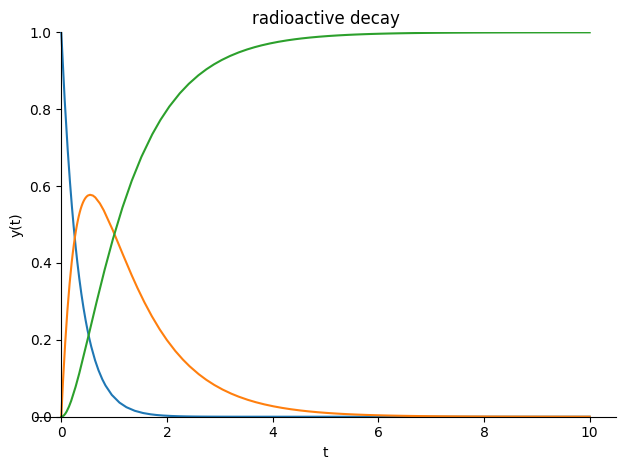

In [ ]:
sp.plot(specific_solns[0],specific_solns[1],specific_solns[2],(t,0,10),ylim=(0,1),xlabel='t',ylabel='y(t)',title='radioactive decay')

# Numerical Solution with `numpy`

Note that this was all manual or symbolic work with sympy, we can do the same thing *numerically* with numpy, though the function names are a bit different. Also to get a numerical solution you must use numerical values for all the parameters invovled from the start (e.g., r1=3 and r2=1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
r1 = 3 # use numerical values for r1 and r2. Say r1 = 3, and r2 = 1
r2 = 1
A = np.array([[-r1, 0, 0],[r1, -r2, 0],[0, +r2, 0]])
A

array([[-3,  0,  0],
       [ 3, -1,  0],
       [ 0,  1,  0]])

In [ ]:
vals,vecs = np.linalg.eig(A) # get the numerical eigenvalues and eigenvectors
vals

array([ 0., -1., -3.])

In [ ]:
# Note that while these are still proportional to the eigenvectors from sympy, they are not normalized the same way
# in numpy the eigenvectors are normalize so that the sum of the squares of the vertical elements is 1. Remember
# that the eigenvectors are arranged vertically so they can be multiplied by the coefficient vector on the right
# to get the initial conditions.
#

vecs

array([[ 0.        ,  0.        ,  0.53452248],
       [ 0.        ,  0.70710678, -0.80178373],
       [ 1.        , -0.70710678,  0.26726124]])

In [ ]:
y0 = np.array([1,0,0])
y0 # the initial conditions for the system, all material 1, zero everything else.

array([1, 0, 0])

In [ ]:
c = np.linalg.inv(vecs) @ y0  # solve for the coefficient for each eigenvector to get the initial conditions
c

array([1.        , 2.12132034, 1.87082869])

In [ ]:
vecs@c # check that we get the initial conditions back correctly

array([1., 0., 0.])

In [ ]:
t = np.linspace(0,10,100) # now, at each time, compute the time dependence of the system.
ys = []
for ti in t:
    y = vecs@np.diag(np.exp(vals*ti))@c
    ys.append(y)

ys = np.array(ys) # convert ys into a matrix

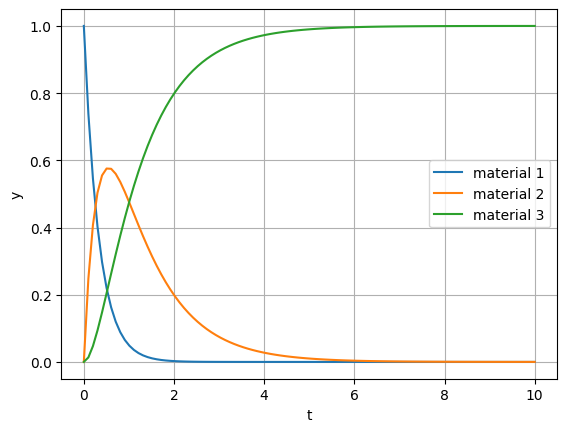

In [ ]:
plt.plot(t,ys.T[0], label="material 1")
plt.plot(t,ys.T[1], label="material 2")
plt.plot(t,ys.T[2], label="material 3")
plt.grid()
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

# Now it's your turn!

Suppose we have the following system:

![circuit](https://raw.githubusercontent.com/201820-SWEN-230/MATH-330-Activities/main/Images/circuit_act5.png)

We can start the voltage $V_1$ at 1V, and force $V_2$ to be zero initially. How can we determine the behavior of the system at future times? We can use our experience with Kirchoff's voltage law and Kirchoff's current law, as well as our knowledge of resistors and capacitors to produce some differential equations that govern the system.

First: the current through resistor $R_1$, let's call it $I_1$ must be $(V_1 - V_2)/R_1$ by Ohm's Law.

This current is also minus the rate of change of the charge on $C_1$, so that also affects the rate of change of the voltage $V_1$, so we get:

$$ I_1 = (V_1-V_2)/R_1 = -dQ_1/dt = -C_1 dV_1/dt $$

The current through the resister $R_2$, let's call it $I_2$ must be $V_2/R_2$ by Ohm's Law.

$$ I_2 = V_2/R_2 $$

This current depletes the charge on $C_2$, while $I_1$ increase the charge on $C_2$ so we get:

$$ dQ_2/dt = C_2 dV_2/dt = I_1 - I_2 =  (V_1 - V_2)/R_1 - V_2/R_2 $$

Solving these two equations for $dV_1/dt$ and $dV_2/dt$ gives us:

\begin{align}
dV_1/dt & = \frac{-1}{C_1 R_1}(V_1 - V_2)\\
dV_2/dt & = \frac{1}{C_2}\left ((V_1 - V_2)/R_1 - V_2/R_2 \right)
\end{align}

We can define three time constants:

\begin{align}
\tau_1 & = R_1 C_1 \\
\tau_2 & = R_1 C_2 \\
\tau_3 & = R_2 C_2
\end{align}

If we use $R_1 = 1 {\rm k\Omega}$ and $R_2 = 2 {\rm k\Omega}$ and $C_1 = {\rm 1000\mu F}, and C_2 ={\rm 2000\mu F}$ then these time constant work out as:

\begin{align}
\tau_1 & = R_1 C_1 = 1 {\rm sec} \\
\tau_2 & = R_1 C_2 = 2 {\rm sec} \\
\tau_3 & = R_2 C_2 = 4 {\rm sec}
\end{align}

Using these time constants the equations simplify to:

\begin{align}
dV_1/dt & = \frac{-V_1}{\tau_1} + \frac{V_2}{\tau_1}\\
dV_2/dt & = \frac{V_1}{\tau_2} - V_2 \left( \frac{1}{\tau_2} + \frac{1}{\tau_3}\right)
\end{align}

which you can convert to a system:

$$ \frac{d\vec{V}}{dt} = A \vec{V} $$

where:

$$ \vec{V} = \begin{bmatrix} V_1 \\ V_2 \end{bmatrix} $$

## Questions

1. Convert this sytem of equations into a linear transformation of $\vec{V}$ onto $d\vec{V}/dt$. What is the matrix $A$? Explain your reasoning.
2. Find the eigenvalues and eigenvectors of this transformation.
3. Let the initial condition be $V_1$=1 Volt, and $V_2$=0 Volts. Find the eigenvector coefficients $c$ that produce this initial condition
4. Solve for the volages $V_1$ and $V_2$ as a function of time in terms of $\tau_1$, $\tau_2$, and $\tau_3$.
5. Use `numpy` to find numerical solutions for the numerical $\tau_n$ values proposed above.


As a check, when you're finished the final graph should look like this:

![output](https://raw.githubusercontent.com/201820-SWEN-230/MATH-330-Activities/main/Images/output_act5.png)